## Use the S1.txt data file and plot the datapoints. Split the dataset into train and test set. Implement KNN algorithm on your own and classify the datapoints and then use sklearn's KNN to compare. 

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.metrics import accuracy_score
import numpy as np
import scipy.spatial
from collections import Counter
from math import sqrt
import statistics
from statistics import mode
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [180]:
X = pd.read_table('S1.txt', delim_whitespace=True, names=('Xcord', 'Ycord'))
X.head()

,Xcord,Ycord
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


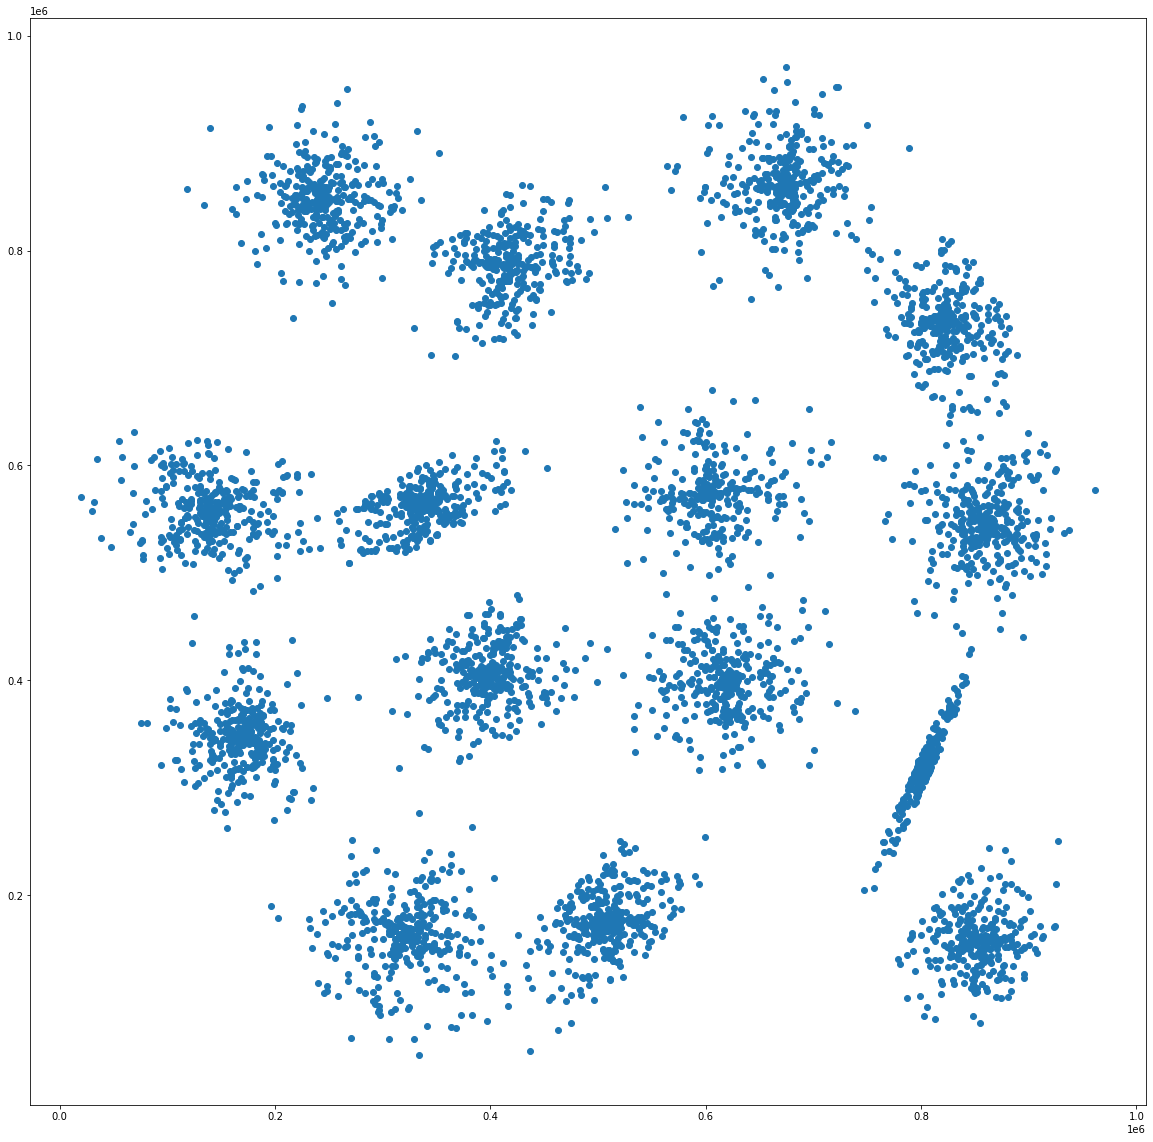

In [181]:
#Plotting data points
plt.scatter(X.iloc[:,0], X.iloc[:,1])

In [182]:
# Scaling input features
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

In [183]:
print(X_scale)
print(X_scale.shape)

[[0.61045883 0.23847578]
 [0.61735618 0.26824035]
 [0.33642184 0.34275992]
 ...
 [0.55523906 1.55441419]
 [0.34654287 1.54353712]
 [0.69199982 1.47511126]]
(5000, 2)


In [184]:
y = pd.read_csv('S1-labels.pa', header=None)
y.head()
y.shape

(5000, 1)

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=20)
# Stratify the split data set to ensure distribution of output classes in test & train data sets


In [186]:
# Using scikit learns KNN classifier
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train.values.ravel())
y_pred=KNN_model.predict(X_test)

In [187]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 63,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 63,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 66,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 68,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 68,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 69,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 69,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 70,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 69,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [188]:
print(classification_report(y_test, y_pred))
#Observations
# Accuracy is 99% 
# Diagonal elements in Confusion matrix shows the number of correctly predicted labels
# Non diagonal elelments in Confusion matrix shows number of incorrectly predicted labels

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        63
           3       1.00      0.98      0.99        63
           4       0.97      0.98      0.98        64
           5       0.98      1.00      0.99        64
           6       1.00      0.95      0.98        66
           7       1.00      0.99      0.99        67
           8       0.99      1.00      0.99        67
           9       1.00      1.00      1.00        68
          10       1.00      0.99      0.99        69
          11       0.95      1.00      0.97        69
          12       0.99      0.99      0.99        70
          13       1.00      1.00      1.00        70
          14       1.00      0.99      0.99        70
          15       1.00      1.00      1.00        70

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99   

In [189]:
# Checking best number of clusters using f1 score 
f1_list=[] # declare f1 score as list
k_list=[] # Number of clusters list 
for k in range(3,10): # Checking best vaue of k in between 3 -10
    model=neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train.values.ravel())
    y_pred=model.predict(X_test)
    f_score=f1_score(y_test,y_pred,average='macro')# Using scikitlearn in built f1 function
    f1_list.append(f_score)
    k_list.append(k)

In [190]:
f1_list # Below are f1 scores for various k values

[0.9910574657774073,
 0.9890799305877849,
 0.9910574657774073,
 0.9900704394014714,
 0.9900704394014714,
 0.9900183204006372,
 0.9900704394014714]

In [191]:
opt_f1_score=max(f1_list) # Choosing max f1 value
best_k=k_list[f1_list.index(opt_f1_score)]  
print('Optimal number of clusters')
print(best_k)

Optimal number of clusters
3


In [192]:
# Implementing KNN own approach


In [200]:
X = pd.read_table('S1.txt', delim_whitespace=True, names=('Xcord', 'Ycord'))
X.head()

,Xcord,Ycord
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [201]:
X.shape

(5000, 2)

In [202]:
y = pd.read_csv('S1-labels.pa', header=None)
print(y.shape)
y.head()

(5000, 1)


,0
0,1
1,1
2,1
3,1
4,1


In [43]:
def euclidean_distance(row1, row2):
        distance = 0.0
        for i in range(len(row1)-1):
            distance += (row1[i] - row2[i])**2
        return sqrt(distance)

In [203]:
#Scaling input features
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2, stratify = y, random_state =20)
# Stratify = y to ensure simialr distribution of output classes in test and train data set

In [64]:
def euclidean_distance(row1, row2):
        distance = 0.0
        for i in range(len(row1)-1):
            distance += (row1[i] - row2[i])**2
        return sqrt(distance)

In [205]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2) # Using in built scipy function to calculate euclidean distance
    
    def predict(self, X_test): # Defining predict function
        output = [] # Declare list for predictions
        for i in range(len(X_test)): # Loop over X_test values
            distance = [] #List for distances calculated
            labels = [] # List for output class labels for nearest k neighbours 
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                distance.append([dist, j]) # Add calaculated euclidean distance and corresponding row index to list
            distance.sort() # Sort the list
            distance = distance[0:self.k] # Take only k shortest distance values and their corresponding labels
            #print(d)
            for d, j in distance:
                labels.append(y_train.iloc[j,0])
            ans = mode(labels) # Finding most frequent class label among k nearest neighbours
            output.append(ans) # Adding the result label to output  
        return output

In [206]:
clf = KNN(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [209]:
print('Accuracy of model')
print(accuracy_score(y_test, y_pred)*100)

Accuracy of model
99.1


In [210]:
y_pred # Printing predicted labels

[2,
 4,
 13,
 9,
 11,
 8,
 6,
 2,
 1,
 3,
 8,
 15,
 9,
 4,
 15,
 3,
 11,
 10,
 5,
 8,
 8,
 12,
 10,
 8,
 10,
 6,
 5,
 14,
 9,
 9,
 12,
 10,
 5,
 1,
 2,
 10,
 11,
 5,
 7,
 8,
 14,
 13,
 11,
 5,
 12,
 12,
 3,
 15,
 8,
 2,
 5,
 13,
 13,
 15,
 7,
 5,
 12,
 2,
 4,
 4,
 15,
 8,
 13,
 12,
 2,
 3,
 10,
 7,
 9,
 3,
 12,
 10,
 12,
 7,
 12,
 11,
 4,
 7,
 13,
 9,
 3,
 11,
 9,
 15,
 8,
 8,
 13,
 15,
 5,
 7,
 12,
 2,
 12,
 13,
 12,
 7,
 5,
 11,
 9,
 6,
 1,
 5,
 10,
 9,
 6,
 11,
 10,
 3,
 11,
 10,
 9,
 14,
 11,
 1,
 12,
 8,
 2,
 4,
 14,
 15,
 14,
 5,
 12,
 4,
 14,
 1,
 14,
 15,
 2,
 15,
 13,
 3,
 10,
 9,
 2,
 5,
 10,
 9,
 11,
 1,
 11,
 7,
 4,
 2,
 15,
 4,
 1,
 13,
 12,
 4,
 12,
 5,
 12,
 6,
 12,
 10,
 7,
 7,
 10,
 5,
 6,
 13,
 9,
 4,
 10,
 4,
 5,
 5,
 12,
 2,
 4,
 7,
 5,
 12,
 11,
 6,
 15,
 6,
 8,
 8,
 9,
 13,
 2,
 6,
 12,
 1,
 15,
 4,
 1,
 13,
 7,
 6,
 4,
 14,
 14,
 15,
 12,
 1,
 8,
 2,
 4,
 12,
 12,
 1,
 4,
 2,
 2,
 14,
 7,
 13,
 3,
 6,
 1,
 2,
 12,
 4,
 7,
 7,
 12,
 7,
 13,
 14,
 12,
 1,
 8,
 15,


In [92]:
# Observations
#Accuracy of sklearnsKNN and own KNN is almost same at 99%
#k = 3 gives best f1 score and both models are compared at k = 3
# Data is split in stratified fashion to ensure similar distribution of output classes in training and testing data set

## Use S2.txt data file and plot the datapoints. Figure out the optimal clusters that can be formed and make clusters. Plot the datapoints and centroid.(Use both your own implementation and Sklearn's).

In [22]:
X = pd.read_csv('S2.txt',delim_whitespace=True, names=('Xcord', 'Ycord'))
X.head()

,Xcord,Ycord
0,624474,837604
1,673412,735362
2,647442,677000
3,532283,741384
4,646529,742844


In [23]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

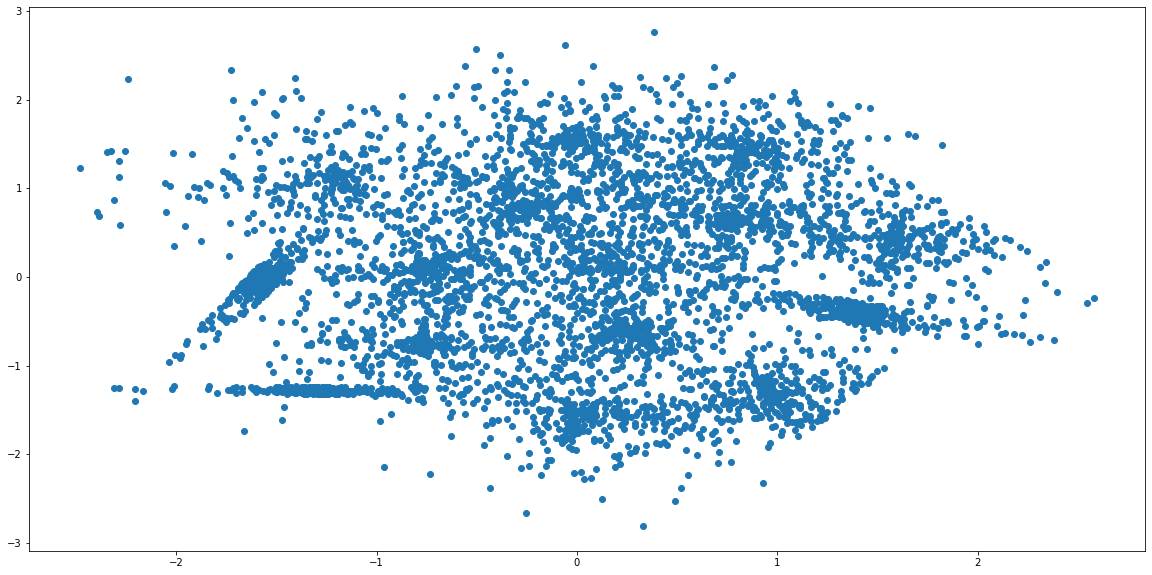

In [24]:
# plotting datapoints
plt.rcParams["figure.figsize"] = (20,10) 
plt.scatter(X[:,0], X[:,1])

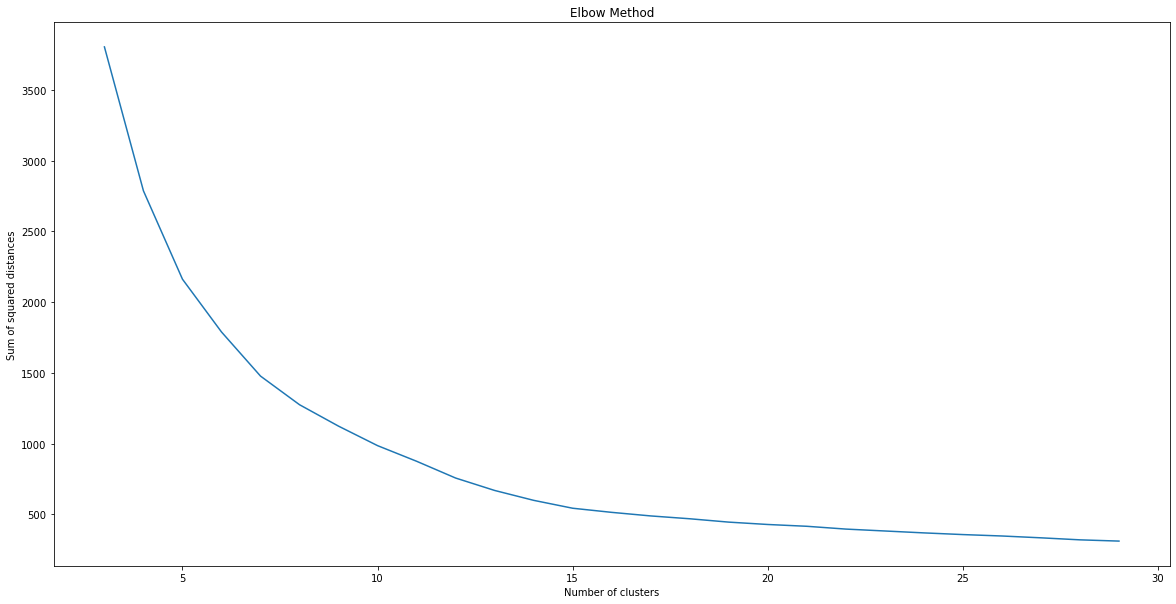

In [6]:
# To find out optimal number of clusters using Elbow method 
ssd = []
for i in range(3,30): # number of clusters between 1-11
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_) #kmeans.inertia_ gives Sum of squared distances of samples to their closest cluster center
plt.plot(range(3, 30), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [ ]:
# Using elbow method , elbow point is achieved at 8 clusters

In [7]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=10, n_init=10, random_state=2)
kmeans.fit(X)
label = kmeans.fit_predict(X)
#kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
#init: "k-means++" used instead of "random" to ensure centroids are initialized with some distance between them. 
#max_iter: You’ll increase the number of iterations per initialization to ensure that k-means will converge.

In [28]:
# Determining optimal number of clusters using silhouette score
valueK = list()
silhouetteScore = list()
silhouettesamples = list()
for k in range(3, 10):
    labels = list()
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=20, n_init=10, random_state=2)
    kmeans.fit(X)
    labels = kmeans.fit_predict(X)
    valueK.append(k)
    silhouetteScore.append(silhouette_score(X, labels))# Calculating average silhouette score for each value of k
    silhouettesamples.append(silhouette_samples(X,labels))# Calculating silhouette score for samples

In [33]:
valueK

[3, 4, 5, 6, 7, 8, 9]

In [30]:
silhouetteScore

[0.40094246407186757,
 0.38640835157234077,
 0.38821374699817124,
 0.4020315279179669,
 0.41030675628001734,
 0.4201463355953996,
 0.4192114071931532]

In [ ]:
# It can be observed that silhouette score is high for k = 8. Hence optimal number of clusters is 8

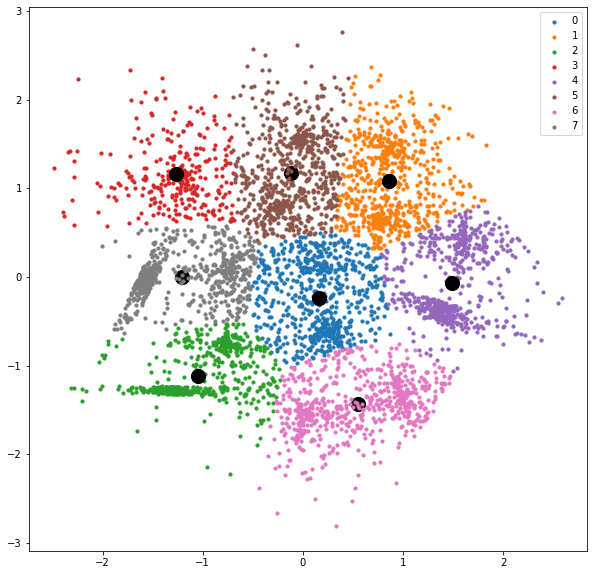

In [8]:
#Getting unique labels
 
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
plt.rcParams["figure.figsize"] = (10,10) 
for i in u_labels:
    filtered_labeli = X[label == i] #filters datapoints that belong to cluster label i
    plt.scatter(filtered_labeli[:,0] , filtered_labeli[:,1] , label = i, marker = "o", s = 10) 
    plt.scatter(centroids[-i,0] , centroids[-i,1] , s = 200,color = 'black') # Plot centroid of cluster i
plt.legend()
plt.show()



In [ ]:
# Using own approach

In [9]:
X = pd.read_csv('S2.txt',delim_whitespace=True, names=('Xcord', 'Ycord'))
X.head()

,Xcord,Ycord
0,624474,837604
1,673412,735362
2,647442,677000
3,532283,741384
4,646529,742844


In [10]:
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

In [11]:
X_scale

array([[ 0.72905927,  1.96205575],
       [ 1.0227693 ,  1.37289377],
       [ 0.86690577,  1.03658706],
       ...,
       [ 0.39771873,  1.39031359],
       [-0.35056426,  2.19961753],
       [-0.41385794,  1.82872473]])

In [17]:
def compute_clusters(X, centroids, k):
    clusters = {} # Empty clusters
    for i in range(k):
        clusters[i] = []
    for point in X:
        dist = [] # List of euclidean distances 
        for j in range(k):
            euclidean_distance = np.linalg.norm(point - centroids[j])# Calculating euclidean distance using numpy linalg
            dist.append(euclidean_distance)
        clusters[dist.index(min(dist))].append(point)## dist.index(min(dist)) gives index of minimum euclidean distance
    return clusters    
 
def compute_centroids(centroids, clusters, k):
    for i in range(k):
        centroids[i] = np.average(clusters[i], axis=0) # Find cluster average at ith index and average value becomes new centroid
    return centroids

def plot_clusters(centroids, clusters, k):
    colors = ['red', 'blue' , 'green', 'orange', 'cyan', 'gray', 'yellow', 'purple']
    plt.rcParams["figure.figsize"] = (10,10) 
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], s = 10, c = colors[i]) # Plotting clusters       
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)# Plotting centroids

def k_means_clustering(X, centroids={}, k, iterations=20):# number of clusters 8 basis elbow method
    for i in range(k):
        centroids[i] = X[i]
    for i in range(iterations):# Loop till max iterations are reached       
        clusters = compute_clusters(X, centroids, k) #recalculate clusters 
        centroids = compute_centroids(centroids, clusters, k) # recalculate centroids
        if i == range(iterations)[0]:
            plot_clusters(centroids, clusters, k)# Plot clusters after max iterations

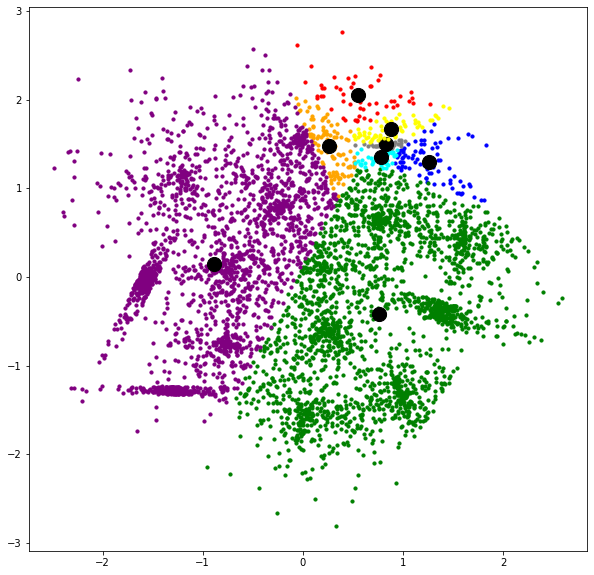

In [18]:
k_means_clustering(X_scale, k=8)

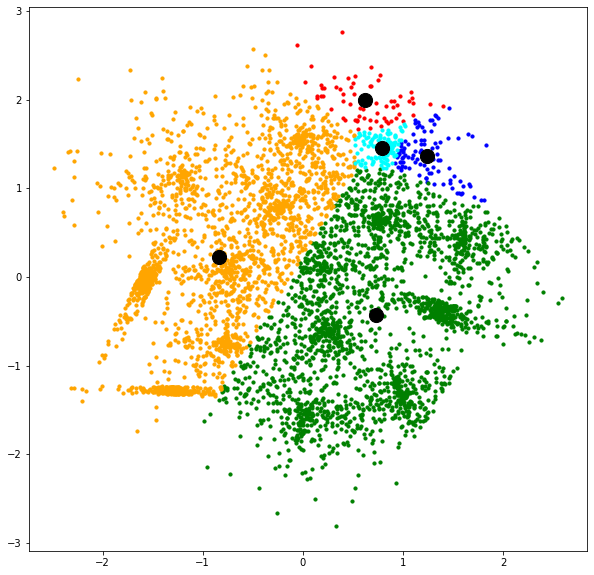

In [34]:
k_means_clustering(X_scale, k=5)